In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN

In [2]:
blobs = pd.read_csv('csvs/cluster_blobs.csv')
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


In [3]:
moons = pd.read_csv('csvs/cluster_moons.csv')
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


In [4]:
circles = pd.read_csv('csvs/cluster_circles.csv')
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


In [5]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')
    plt.show()

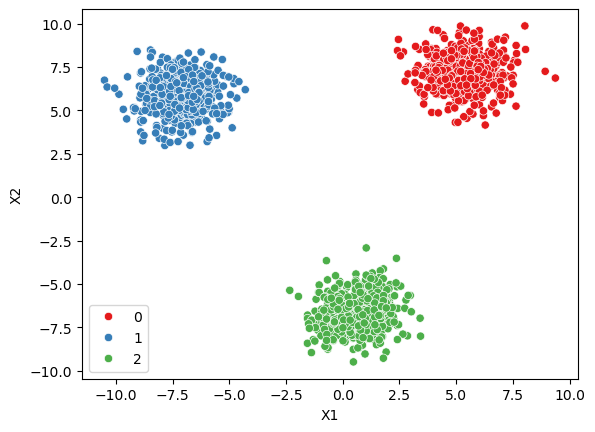

In [6]:
model = DBSCAN(eps=2)
display_categories(model, blobs)


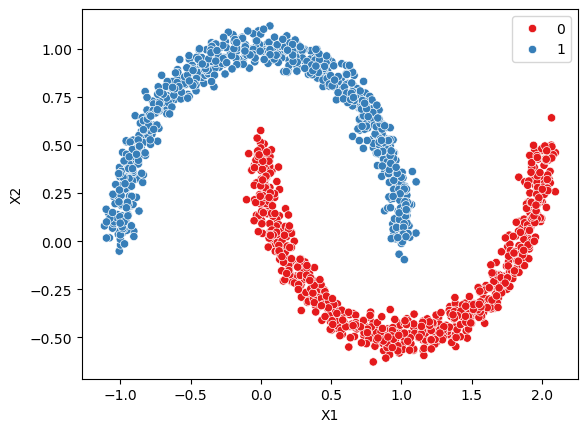

In [7]:
model = DBSCAN(eps=0.15)
display_categories(model, moons)

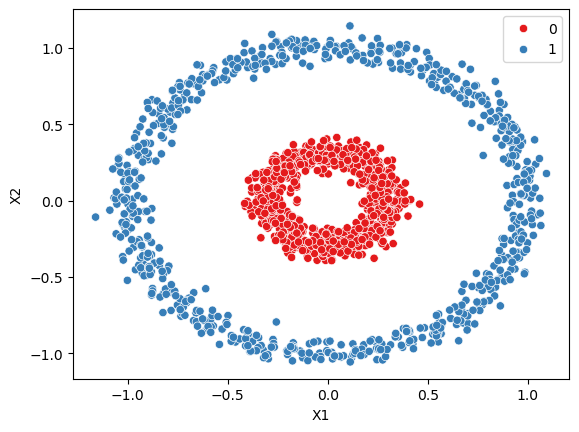

In [8]:
model = DBSCAN(eps=0.15)
display_categories(model, circles)

In [9]:
two_blobs_outliers = pd.read_csv('csvs/cluster_two_blobs_outliers.csv')
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<Axes: xlabel='X1', ylabel='X2'>

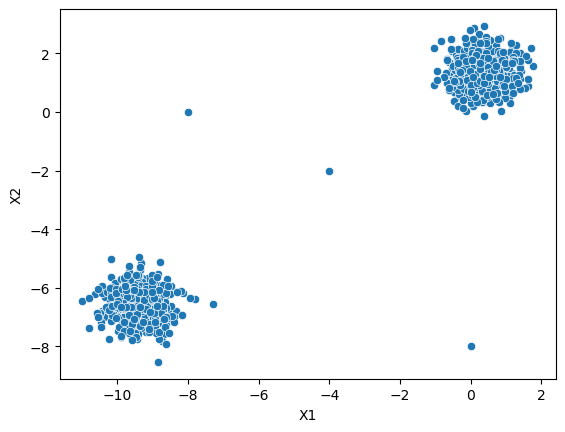

In [10]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

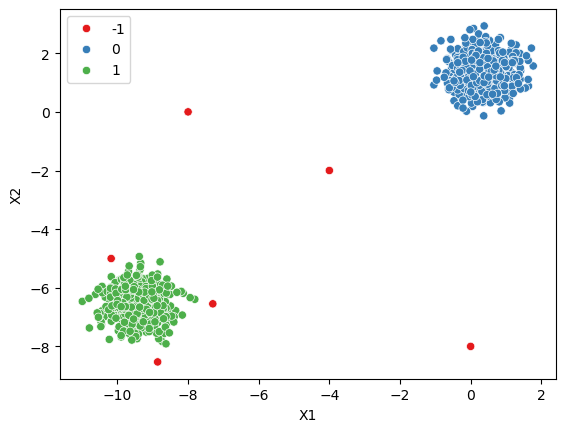

In [11]:
model = DBSCAN()
display_categories(model, two_blobs_outliers)

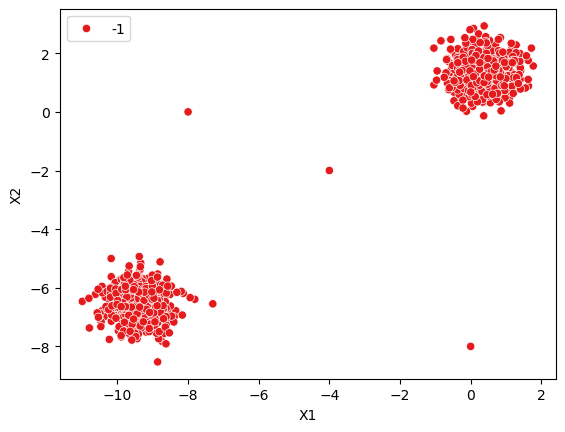

In [12]:
model = DBSCAN(eps=0.001)
display_categories(model, two_blobs_outliers)

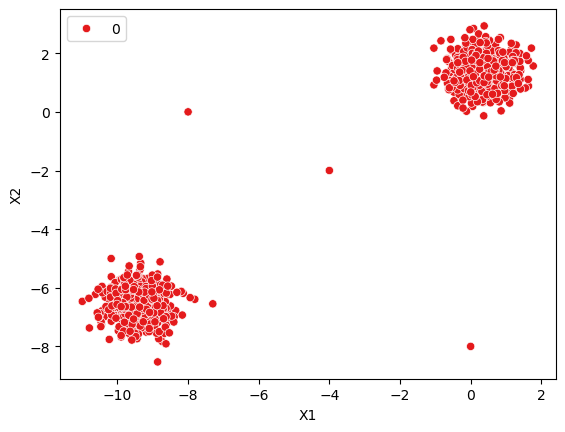

In [13]:
model = DBSCAN(eps=10)
display_categories(model, two_blobs_outliers)


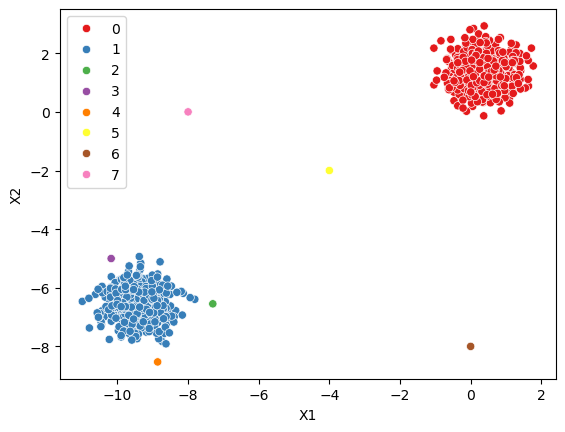

In [14]:
model = DBSCAN(min_samples=1)
display_categories(model, two_blobs_outliers)

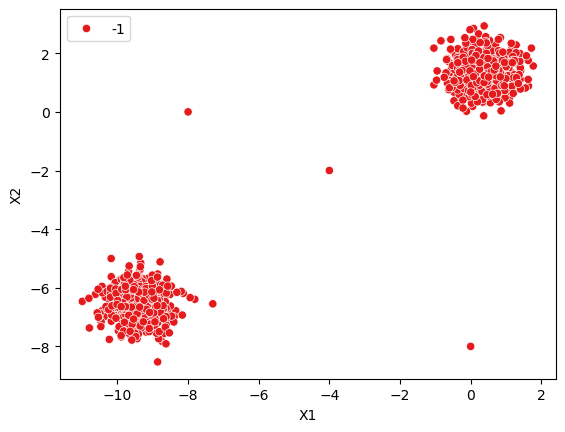

In [15]:
model = DBSCAN(min_samples=1000)
display_categories(model, two_blobs_outliers)

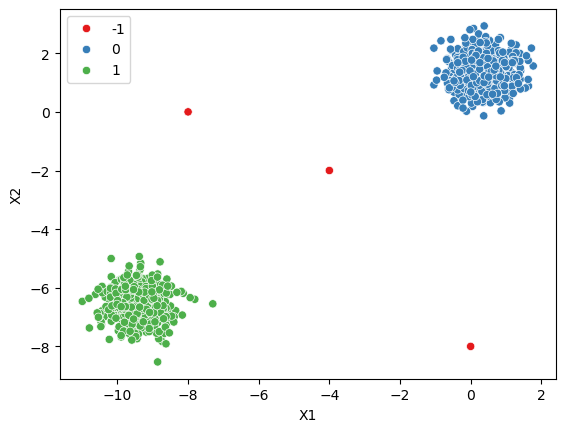

In [16]:
model = DBSCAN(eps=1)
display_categories(model, two_blobs_outliers)

In [17]:
print(model.labels_)
print(np.sum(model.labels_ == -1))
print(100 * np.sum(model.labels_ == -1) / len(model.labels_))

[ 0  1  0 ... -1 -1 -1]
3
0.29910269192422734


In [18]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 7, 200):
    model = DBSCAN(eps=eps)
    model.fit(two_blobs_outliers)
    
    outlier_percent.append(100 * np.sum(model.labels_ == -1) / len(model.labels_))
    number_of_outliers.append(np.sum(model.labels_ == -1))



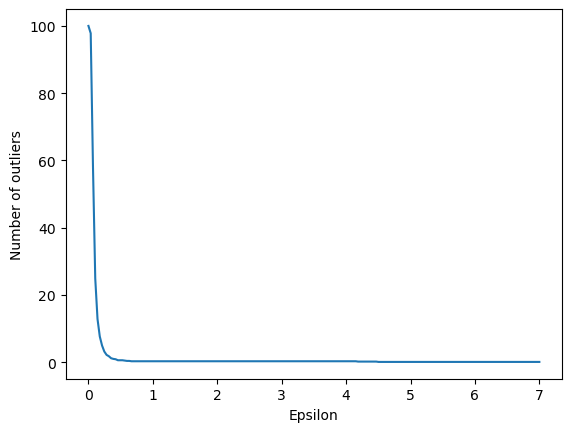

In [19]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outlier_percent)
plt.ylabel('Number of outliers')
plt.xlabel('Epsilon')
plt.show()


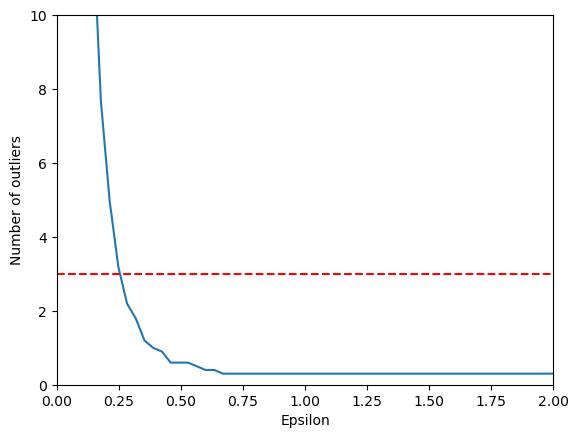

In [20]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outlier_percent)
plt.ylabel('Number of outliers')
plt.xlabel('Epsilon')
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y=3, xmin=0, xmax=2, colors='r', linestyles='--')
plt.show()

In [21]:
outlier_percent = []
number_of_outliers = []
for n in range(1, 100):
    model = DBSCAN(min_samples=n)
    model.fit(two_blobs_outliers)
    outlier_percent.append(100 * np.sum(model.labels_ == -1) / len(model.labels_))
    number_of_outliers.append(np.sum(model.labels_ == -1))

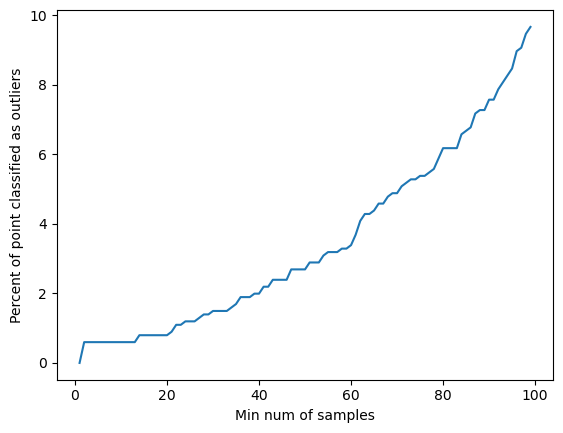

In [22]:
sns.lineplot(x=np.arange(1, 100), y=outlier_percent)
plt.xlabel('Min num of samples')
plt.ylabel('Percent of point classified as outliers')
plt.show()

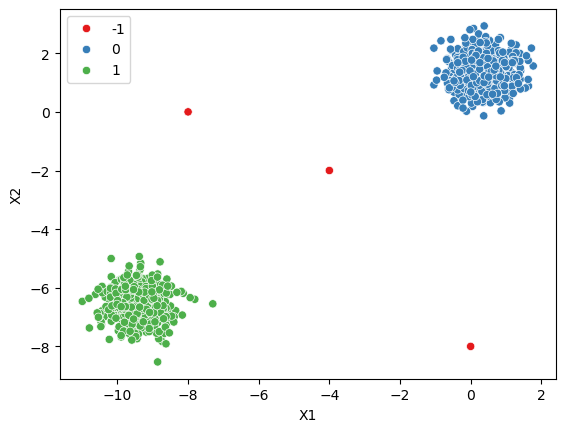

In [23]:
num_dim = two_blobs_outliers.shape[1]

model = DBSCAN(eps=0.75, min_samples=2*num_dim)
display_categories(model, two_blobs_outliers)

Class Exercise - DBSCAN - 30/03

In [24]:
tree_blobs_with_outlier = pd.read_csv('csvs/tree_blobs_with_outlier.csv')
tree_blobs_with_outlier.head()

,Unnamed: 0,X1,X2
0,0,0.712637,-0.642030
1,1,0.862914,0.679089
2,2,-0.373790,-1.026300
3,3,-1.748317,-1.140605
4,4,1.129667,0.947943


In [25]:
tree_blobs_with_outlier['Unnamed: 0'].value_counts()
# Irrelevant column

Unnamed: 0
0      1
537    1
527    1
528    1
529    1
      ..
269    1
270    1
271    1
272    1
799    1
Name: count, Length: 800, dtype: int64

In [26]:
tree_blobs_with_outlier.drop(['Unnamed: 0'], axis=1 ,inplace=True)
tree_blobs_with_outlier.head()

,X1,X2
0,0.712637,-0.642030
1,0.862914,0.679089
2,-0.373790,-1.026300
3,-1.748317,-1.140605
4,1.129667,0.947943


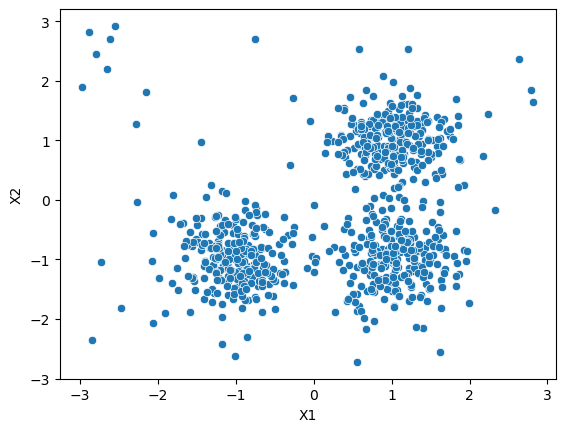

In [27]:
sns.scatterplot(data=tree_blobs_with_outlier, x='X1', y='X2')
plt.show()

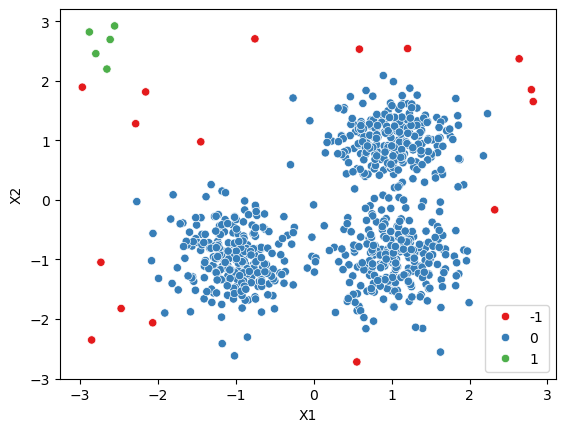

In [28]:
model = DBSCAN()
labels = model.fit_predict(tree_blobs_with_outlier)
sns.scatterplot(data=tree_blobs_with_outlier, x='X1', y='X2', hue=labels, palette='Set1')
plt.show()

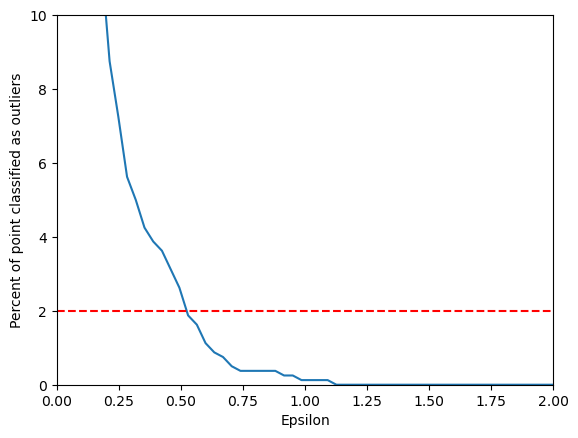

In [29]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 7, 200):
    model = DBSCAN(eps=eps)
    model.fit(tree_blobs_with_outlier)
    
    outlier_percent.append(100 * np.sum(model.labels_ == -1) / len(model.labels_))
    number_of_outliers.append(np.sum(model.labels_ == -1))
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outlier_percent)
plt.ylabel('Percent of point classified as outliers')
plt.xlabel('Epsilon')
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y=2, xmin=0, xmax=2, colors='r', linestyles='--')
plt.show()



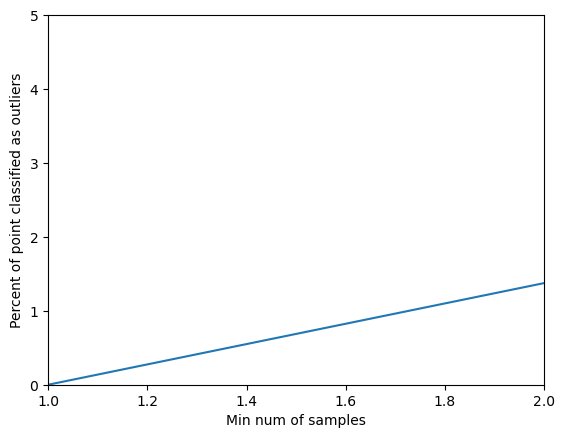

In [30]:
outlier_percent = []
number_of_outliers = []
for n in range(1, 100):
    model = DBSCAN(min_samples=n)
    model.fit(tree_blobs_with_outlier)
    outlier_percent.append(100 * np.sum(model.labels_ == -1) / len(model.labels_))
    number_of_outliers.append(np.sum(model.labels_ == -1))
sns.lineplot(x=np.arange(1, 100), y=outlier_percent)
plt.xlabel('Min num of samples')
plt.ylabel('Percent of point classified as outliers')
plt.xlim(1, 2)
plt.ylim(0, 5)
plt.show()

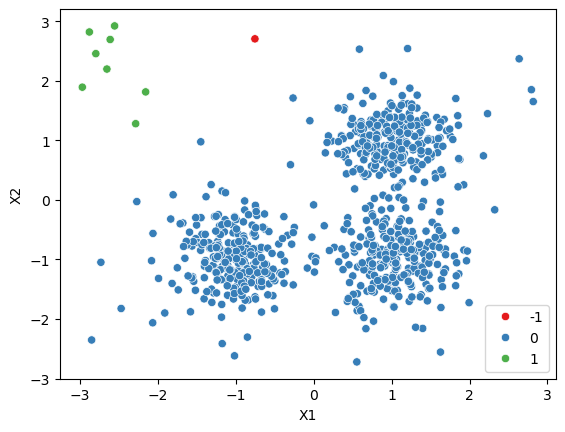

In [31]:
num_dim = tree_blobs_with_outlier.shape[1]

model = DBSCAN(eps=.75, min_samples=1*num_dim)
labels = model.fit_predict(tree_blobs_with_outlier)
sns.scatterplot(data=tree_blobs_with_outlier, x='X1', y='X2', hue=labels, palette='Set1')
plt.show()

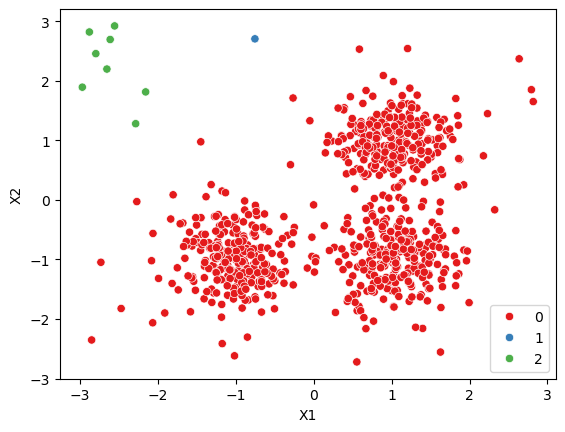

In [32]:
model = DBSCAN(eps=0.8, min_samples=1)
labels = model.fit_predict(tree_blobs_with_outlier)
sns.scatterplot(data=tree_blobs_with_outlier, x='X1', y='X2', hue=labels, palette='Set1')
plt.show()

End of class 30/03